### Ejemplos de ingeniería de características: clasificación de características categóricas

#### Cómo usar NumPy o Pandas para clasificar rápidamente características categóricas


__Max Steele__

https://towardsdatascience.com/feature-engineering-examples-binning-categorical-features-9f8d582455da


Trabajar con datos categóricos para fines de aprendizaje automático (ML) a veces puede presentar problemas complicados. En última instancia, estas características deben codificarse numéricamente de alguna manera para que un algoritmo de ML pueda realmente trabajar con ellas.

También deberá considerar métodos adicionales para preparar sus características categóricas para el modelado. Por ejemplo, el rendimiento de su modelo puede beneficiarse de la clasificación de características categóricas . Esto significa básicamente agrupar varias categorías en una sola categoría. Al aplicar el conocimiento del dominio, puede ser capaz de diseñar nuevas categorías y características que representen mejor la estructura de sus datos.

En esta publicación, explicaremos brevemente por qué puede resultar beneficioso agrupar las características categóricas. Luego, repasaremos tres métodos diferentes para agrupar las características categóricas con ejemplos específicos utilizando NumPy y Pandas.

#### ¿Por qué categorías de contenedores?

Con las características categóricas, puede encontrar problemas con etiquetas poco comunes , categorías o grupos que son extremadamente poco comunes dentro de su conjunto de datos. Este problema suele estar relacionado con características que tienen una cardinalidad alta ; en otras palabras, muchas categorías diferentes.

Tener demasiadas categorías, y especialmente categorías poco frecuentes, genera un conjunto de datos ruidoso. Puede resultar difícil para un algoritmo de aprendizaje automático eliminar este ruido y aprender de las señales más significativas de los datos.

Una cardinalidad alta también puede exacerbar la maldición de la dimensionalidad si eliges codificar en caliente tus características categóricas. Si la variable original tiene 50 categorías diferentes, básicamente estás agregando 49 columnas a tu conjunto de datos.

Tener demasiadas categorías también puede generar problemas al entrenar y probar el modelo. Es completamente posible que una categoría aparezca en el conjunto de prueba, pero no en el conjunto de entrenamiento. El modelo no tendría idea de cómo manejar esa categoría porque nunca la ha "visto" antes.

Una forma de abordar estos problemas es diseñar nuevas funciones que tengan menos categorías. Esto se puede lograr agrupando varias categorías en una sola.

En los siguientes ejemplos, exploraremos y diseñaremos características a partir de un conjunto de datos con información sobre la participación y la demografía de los votantes. He seleccionado tres variables categóricas con las que trabajar:

party_cd: afiliación a un partido político de un votante registrado
voting_method:cómo un votante registrado emitió su voto en las elecciones
birth_state: el estado o territorio de EE. UU. donde nació un votante registrado

__Captura de pantalla de las primeras 5 filas de DataFrame__

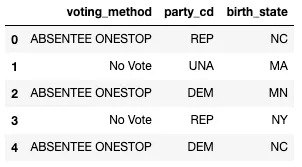

Si desea comenzar a aplicar estos métodos a sus propios proyectos, solo tendrá que asegurarse de tener instalados NumPy y Pandas y luego importar ambos.

In [1]:
import pandas as pd
import numpy as np

#### Uso de np.where() para clasificar categorías

Primero, veamos por qué elegí `party_cd`. La imagen a continuación muestra cuántos votantes individuales pertenecen a cada partido político.

__Diagrama de recuento de Seaborn que muestra la distribución de votantes por partido político__

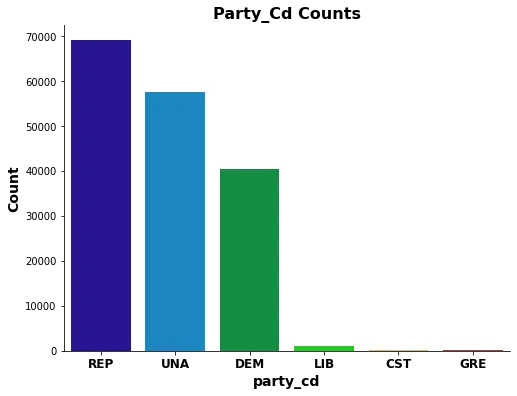

Hay tan pocos libertarios, constitucionalistas y miembros del Partido Verde registrados que apenas podemos verlos en el gráfico. Estos serían buenos ejemplos de etiquetas raras. Para los fines de esta publicación, definiremos las etiquetas raras como aquellas que representan menos del 5% de las observaciones. Este es un umbral común para definir etiquetas raras, pero en última instancia eso depende de su criterio.

Veamos un desglose de las cifras reales:

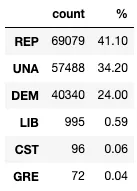

__Recuento bruto y porcentaje de votantes registrados pertenecientes a cada partido__

Esas tres categorías representan cada una mucho menos del 5% de la población. Incluso si las agrupáramos todas en una sola categoría, esa nueva categoría seguiría representando menos del 1% de los votantes.

“REP” y “DEM” representan a los dos partidos políticos principales, mientras que “UNA” representa a los votantes que se registraron como no afiliados a un partido político. Por lo tanto, aquí podría tener sentido agrupar nuestras tres etiquetas poco comunes en ese grupo de no afiliados para que tengamos tres categorías: una para cada uno de los dos partidos principales y una tercera que represente a las personas que decidieron no alinearse con ninguno de los partidos principales.

Esto se puede lograr muy fácilmente con np.where()lo que toma 3 argumentos:

1.Una condición
2.Qué devolver si se cumple la condición
3.Qué devolver si no se cumple la condición

El siguiente código crea una nueva característica, `party_grp`, a partir de la variable original `party_cd` usando `np.where()`:

In [2]:
np.random.seed(42)  # Para reproducibilidad
party_cd_values = np.random.choice(['REP', 'DEM', 'IND', 'LIB', 'GRN'], 100)

# Crear el DataFrame
df = pd.DataFrame({'party_cd': party_cd_values})

In [3]:

df['party_grp'] = np.where(df['party_cd'].isin(['REP', 'DEM']),
                           df['party_cd'].str.title(),
                           'Other')
df

,party_cd,party_grp
0,LIB,Other
1,GRN,Other
2,IND,Other
3,GRN,Other
4,GRN,Other
...,...,...
95,IND,Other
96,GRN,Other
97,DEM,Dem
98,DEM,Dem


La condición que comprueba es si el valor original está o no en la lista `['REP', 'DEM']`. Si lo está, `np.where()` simplemente devuelve el código de la parte original (aunque lo he devuelto con mayúscula inicial porque, personalmente, odio ver cosas escritas en mayúsculas). Si el código de la parte original no está en esa lista, `np.where()` devuelve "Otro". Nuestra `party_grp` función recientemente diseñada ahora está mucho más equilibrada sin ninguna etiqueta rara:

#### Asignación de categorías a nuevos grupos con map()

A continuación, echemos un vistazo a la distribución de `voting_method`:

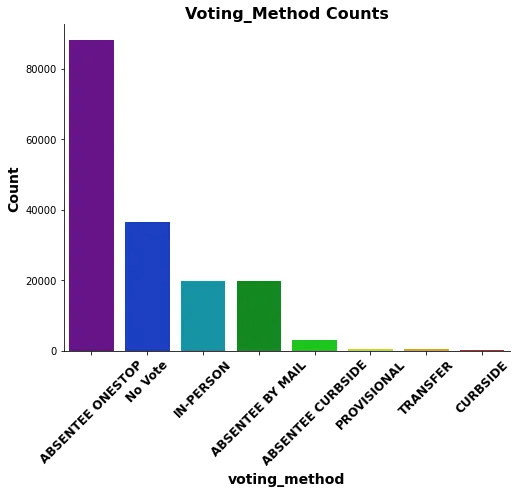

__Diagrama de recuento de Seaborn que muestra la distribución de votantes según el método de votación__

No es el gráfico más bonito, pero nos hace una idea. Tenemos ocho categorías diferentes de métodos de votación. Me atrevería a decir que la mitad de ellas cumplen con nuestra definición de etiquetas poco comunes.

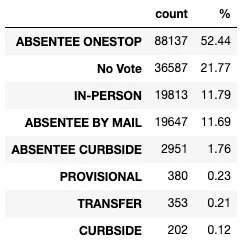

__Recuento bruto y porcentaje de votantes registrados que emitieron su voto mediante cada método__

¡Sí! Cuatro de nuestras categorías son etiquetas poco comunes. Ahora podríamos agruparlas todas en una categoría llamada “Otros” y dar por finalizado el proceso, pero puede que no sea el método más adecuado.

Según la investigación que hice sobre cómo se codifican estos métodos, sé que “Ausente” significa que alguien votó de manera anticipada. Por lo tanto, podríamos agrupar cualquier método de “Ausente” en una categoría de “Anticipado”, agrupar “En persona” y “En la acera” en una categoría de “Día de las elecciones”, dejar “Sin voto” como su propia categoría y agrupar “Provisional” y “Transferencia” en una categoría de “Otros”.

El código siguiente logra esto definiendo primero un diccionario que utiliza las voting_methodcategorías originales como claves. El valor de cada clave es la nueva categoría que realmente queremos.

In [4]:
import pandas as pd
import numpy as np

# Generar los datos iniciales para 100 individuos
np.random.seed(42)  # Para reproducibilidad
party_cd_values = np.random.choice(['REP', 'DEM', 'IND', 'LIB', 'GRN'], 100)
voting_method_values = np.random.choice(['ABSENTEE ONESTOP', 'IN-PERSON', 'ABSENTEE BY MAIL', 
                                         'ABSENTEE CURBSIDE', 'TRANSFER', 'PROVISIONAL', 
                                         'CURBSIDE', 'No Vote'], 100)

# Crear el DataFrame
df = pd.DataFrame({'party_cd': party_cd_values, 'voting_method': voting_method_values})

# Aplicar la lógica para generar 'party_grp'
df['party_grp'] = np.where(df['party_cd'].isin(['REP', 'DEM']),
                           df['party_cd'].str.title(),
                           'Other')

# Definir el mapa de métodos de votación
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Aplicar el mapeo para generar 'vote_method_cat'
df['vote_method_cat'] = df['voting_method'].map(vote_method_map)

# Mostrar el DataFrame resultante
df


,party_cd,voting_method,party_grp,vote_method_cat
0,LIB,ABSENTEE CURBSIDE,Other,Early
1,GRN,CURBSIDE,Other,Election Day
2,IND,ABSENTEE ONESTOP,Other,Early
3,GRN,No Vote,Other,No Vote
4,GRN,ABSENTEE CURBSIDE,Other,Early
...,...,...,...,...
95,IND,ABSENTEE ONESTOP,Other,Early
96,GRN,ABSENTEE BY MAIL,Other,Early
97,DEM,CURBSIDE,Dem,Election Day
98,DEM,PROVISIONAL,Dem,Other


Esa última línea crea una nueva columna, `vote_method_cat`, basada en los valores originales de la `voting_method` columna. Para ello, aplica map()el método de Pandas a la columna original y envía nuestro `vote_method_map` para traducir de la clave al valor correspondiente.

`df['vote_method_cat'] = df['voting_method'].map(vote_method_map)`

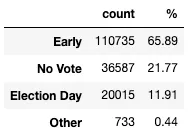

__Recuento bruto y porcentaje de votantes registrados que emitieron su voto mediante cada método__

Ahora nos hemos deshecho de todas nuestras etiquetas menos una. Finalmente, decidí eliminar esos 733 votos "Otros". El método de votación era en realidad la variable objetivo que estaba tratando de predecir y lo que realmente me interesaba era cómo la gente decidía votar. Las papeletas provisionales y de transferencia reflejan mejor el proceso y las regulaciones que rodean la votación, pero mi pregunta se refería específicamente a la elección activa de un votante.

De esta forma, no solo puede pensar en __diseñar funciones predictivas__ para representar mejor la estructura subyacente de sus datos, sino que también puede considerar __cuál es la mejor manera de representar su variable objetivo__ en relación con su pregunta específica.

#### Cómo aplicar una función personalizada con apply()

Por último, vamos a trabajar en la clasificación `birth_state`. Esta variable tiene 57 categorías: una para cada estado, una para la información faltante, una para cada territorio de EE. UU. y una categoría final para las personas nacidas fuera de Estados Unidos.

Así que el gráfico parece cómicamente terrible:

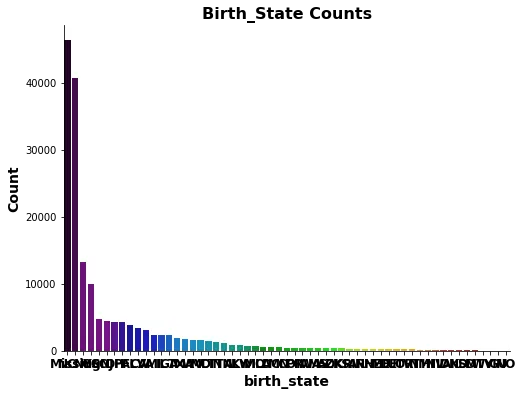

__Diagrama de recuento de Seaborn que muestra la distribución de los votantes según su lugar de nacimiento__

Si alguna vez ve un gráfico como este mientras explora características categóricas, es una buena indicación de que debería considerar agrupar esa variable si pretende usarla como una característica en su modelo.

A continuación se muestra el desglose de las 15 categorías más comunes de `birth_state`:

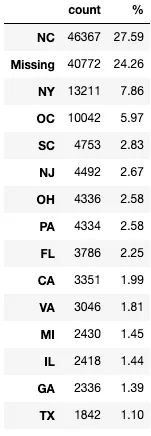

__Recuento bruto y porcentaje de votantes registrados según lugar de nacimiento__

Carolina del Norte es el estado más común, lo que tiene sentido ya que estos datos corresponden a votantes de un condado específico de Carolina del Norte. Luego vemos muchos valores faltantes. Los neoyorquinos y las personas nacidas fuera de los EE. UU. también constituyen una parte considerable de la población. Las 53 categorías restantes son etiquetas poco comunes según nuestra definición e introducirán mucho ruido en nuestros esfuerzos de modelado.

Agruparemos los estados por __región del censo de EE. UU.__
 (Noreste, Sur, Medio Oeste, Oeste). También agruparemos a las personas nacidas en territorios de EE. UU. o fuera del país en un grupo "Otros" y dejaremos "Desaparecidos" como una categoría propia.

Para ello, definiremos nuestra propia función personalizada para traducir de estado a región y luego aplicaremos esa función a nuestra variable original para obtener nuestra nueva característica. Esta es una forma en la que podría escribir una función para verificar cada estado y devolver la región o categoría deseada:

In [12]:
import pandas as pd
import numpy as np

# Generar los datos iniciales para 100 individuos
np.random.seed(42)  # Para reproducibilidad
party_cd_values = np.random.choice(['REP', 'DEM', 'IND', 'LIB', 'GRN'], 100)
voting_method_values = np.random.choice(['ABSENTEE ONESTOP', 'IN-PERSON', 'ABSENTEE BY MAIL', 
                                         'ABSENTEE CURBSIDE', 'TRANSFER', 'PROVISIONAL', 
                                         'CURBSIDE', 'No Vote'], 100)
state_values = np.random.choice(['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA', 'DE', 
                                 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 
                                 'MS', 'TN', 'AR', 'LA', 'OK', 'TX', 'IL', 'IN', 'MI', 'OH', 
                                 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD', 'AZ', 'CO', 
                                 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 
                                 'WA', 'AS', 'GU', 'MP', 'PR', 'VI', 'OC'], 100)

# Crear el DataFrame
df = pd.DataFrame({'party_cd': party_cd_values, 'voting_method': voting_method_values, 'birth_state': state_values})

# Aplicar la lógica para generar 'party_grp'
df['party_grp'] = np.where(df['party_cd'].isin(['REP', 'DEM']),
                           df['party_cd'].str.title(),
                           'Other')

# Definir el mapa de métodos de votación
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Aplicar el mapeo para generar 'vote_method_cat'
df['vote_method_cat'] = df['voting_method'].map(vote_method_map)

# Definir función para agrupar estado de nacimiento en categorías
def get_birth_reg(state):
    # Verificar si es un territorio de EE.UU. o fuera del país
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    # Las demás categorías se basan en las regiones del Censo de EE.UU.
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']:
        return 'Northeast'
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']:
        return 'South'
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    else:
        return 'Missing'

# Aplicar la función para generar 'birth_reg'
df['birth_reg'] = df['birth_state'].apply(get_birth_reg)

# Mostrar el DataFrame resultante
df

,party_cd,voting_method,birth_state,party_grp,vote_method_cat,birth_reg
0,LIB,ABSENTEE CURBSIDE,IL,Other,Early,Midwest
1,GRN,CURBSIDE,PA,Other,Election Day,Northeast
2,IND,ABSENTEE ONESTOP,ND,Other,Early,Midwest
3,GRN,No Vote,KS,Other,No Vote,Midwest
4,GRN,ABSENTEE CURBSIDE,WA,Other,Early,West
...,...,...,...,...,...,...
95,IND,ABSENTEE ONESTOP,VA,Other,Early,South
96,GRN,ABSENTEE BY MAIL,TX,Other,Early,South
97,DEM,CURBSIDE,CA,Dem,Election Day,West
98,DEM,PROVISIONAL,OC,Dem,Other,Other


In [8]:

## Define function for grouping birth state/country into categories
def get_birth_reg(state):
    
    # check if U.S. territory or out of country
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT',
                     'NJ', 'NY', 'PA']:
        return 'Northeast'
    
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 
                     'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR',
                     'LA', 'OK', 'TX']:
        return 'South'
    
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI',
                     'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',
                     'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    
    else:
        return 'Missing'

Y ahora usemos `apply()` el método Pandas para crear nuestra nueva característica:

In [14]:
df['birth_reg'] = df['birth_state'].apply(get_birth_reg)
df

,party_cd,voting_method,birth_state,party_grp,vote_method_cat,birth_reg
0,LIB,ABSENTEE CURBSIDE,IL,Other,Early,Midwest
1,GRN,CURBSIDE,PA,Other,Election Day,Northeast
2,IND,ABSENTEE ONESTOP,ND,Other,Early,Midwest
3,GRN,No Vote,KS,Other,No Vote,Midwest
4,GRN,ABSENTEE CURBSIDE,WA,Other,Early,West
...,...,...,...,...,...,...
95,IND,ABSENTEE ONESTOP,VA,Other,Early,South
96,GRN,ABSENTEE BY MAIL,TX,Other,Early,South
97,DEM,CURBSIDE,CA,Dem,Election Day,West
98,DEM,PROVISIONAL,OC,Dem,Other,Other


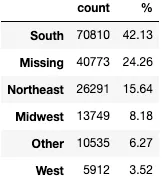

¡Mucho mejor! Hemos pasado de un total de 57 categorías con 53 etiquetas raras a solo 6 categorías que aún tienen mucho significado y solo una de ellas cumple con nuestra definición de etiqueta rara. Podríamos considerar agruparlas más, pero ya entiendes la idea.